In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = {
    'TV_Ad_Spend': [200, 250, 300, 400, 500],
    'Radio_Ad_Spend': [30, 40, 45, 50, 60],
    'Newspaper_Ad_Spend': [40, 50, 60, 70, 80],
    'Age_Segment': [18, 25, 35, 40, 50],  
    'Platform': ['Online', 'Offline', 'Online', 'Offline', 'Online'],  
    'Sales': [2000, 2200, 2500, 3000, 3500]  
}

In [44]:
df = pd.DataFrame(data)

In [45]:
data

{'TV_Ad_Spend': [200, 250, 300, 400, 500],
 'Radio_Ad_Spend': [30, 40, 45, 50, 60],
 'Newspaper_Ad_Spend': [40, 50, 60, 70, 80],
 'Age_Segment': [18, 25, 35, 40, 50],
 'Platform': ['Online', 'Offline', 'Online', 'Offline', 'Online'],
 'Sales': [2000, 2200, 2500, 3000, 3500]}

In [46]:
print(df)

   TV_Ad_Spend  Radio_Ad_Spend  Newspaper_Ad_Spend  Age_Segment Platform  \
0          200              30                  40           18   Online   
1          250              40                  50           25  Offline   
2          300              45                  60           35   Online   
3          400              50                  70           40  Offline   
4          500              60                  80           50   Online   

   Sales  
0   2000  
1   2200  
2   2500  
3   3000  
4   3500  


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()
df['Platform'] = label_encoder.fit_transform(df['Platform'])

In [49]:
X = df[['TV_Ad_Spend', 'Radio_Ad_Spend', 'Newspaper_Ad_Spend', 'Age_Segment', 'Platform']]
y = df['Sales']

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
print(X_train, y_train)

[[ 1.57841037  1.5         1.41421356  1.46195664  0.81649658]
 [-0.27854301  0.          0.          0.12480118  0.81649658]
 [-1.2070197  -1.5        -1.41421356 -1.39064169  0.81649658]
 [ 0.64993368  0.5         0.70710678  0.57051967 -1.22474487]] 4    3500
2    2500
0    2000
3    3000
Name: Sales, dtype: int64


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [58]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 62.72273896969591
Mean Squared Error: 3934.1419838606103
Root Mean Squared Error: 62.72273896969591
R-squared: nan


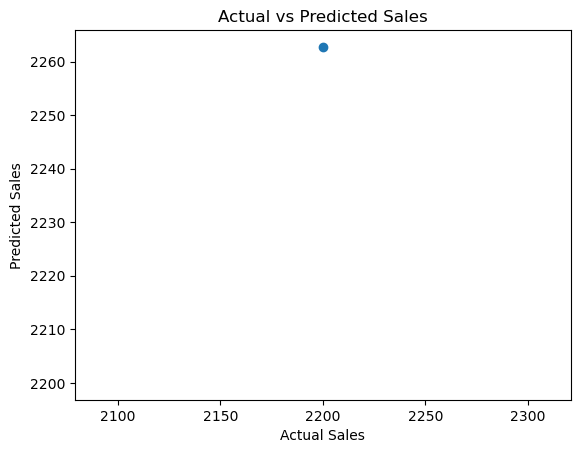

In [59]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()